## Exploring the numpy.random package

Randomly generated data is important in [various kinds of statistical research as well as aspects of computer science such as simulation and cryptography](https://en.wikipedia.org/wiki/Random_number_generation) and other areas where unpredictable results are necessary, for example, lottery-gaming, draws and slot machines. [Stochastic process](https://en.wikipedia.org/wiki/Stochastic_process), which is another term for collecting indexed random variables, has been used in the areas of finance, telecommunications and engineering, to name just a few.  One of the most well-known examples of this is the random walk, a mathematical object that [describes a path that consists of a succession of random steps on some mathematical space such as the integers](https://en.wikipedia.org/wiki/Random_walk), for instance, [the value of pi can be approximated by the usage of random walk in an agent-based modelling environment](https://www.geeksforgeeks.org/random-walk-implementation-python/).
In the case of statistical research, such as surveys that are based on a representative sample of a population (where it would not be feasible to survey an entire nation, for example) a [probability sampling method](https://www.statisticshowto.datasciencecentral.com/probability-sampling/) can be designed to ensure that each member of a specific population has a known and equal chance of being included in a random sample.  Random sampling provides an unbiased interpretation of results. It is an essential element of computer science in general - for example, according to Dr Mads Haahr of www.random.org ["generating data encryption keys, simulating and modeling complex phenomena and for selecting random samples from larger data sets"](https://www.random.org/randomness/).  Jason Brownlee in his [Machine Learning Mastery blog](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) confirms that "the use of randomness is an important part of the configuration and evaluation of machine learning algorithms. From the random initialization of weights in an artificial neural network, to the splitting of data into random train and test sets, to the random shuffling of a training dataset in stochastic gradient descent, generating random numbers and harnessing randomness is a required skill".  I read another very informative blog post on [Sampling Strategies for Recurrent Neural Networks](https://medium.com/machine-learning-at-petiteprogrammer/sampling-strategies-for-recurrent-neural-networks-9aea02a6616f) that delves into the prediction capabilities of these networks when primed with sufficient input that it becomes possible for them to output accurately using a probability distribution. 

![numpy.jpg](numpy.jpg)
[NumPy](http://www.numpy.org/) (which stands for Numerical Python) is a library for the Python programming language, that adds support for huge multi-dimensional arrays and matrices of numbers. It also provides a large collection of high-level mathematical functions to operate on these arrays, and executes much faster than standard Python for this, as the random module in Python [only samples one value at a time](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html). It is an open source project and free to import, generally labelled in Python code as "np". It is part of the [SciPy](https://scipy.org/) ecosystem for Python, which also includes such libraries as pandas and matplotlib.


## numpy.random
[numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) is a submodule of the NumPy package that is used to generate random (or indeed, pseudorandom) numbers, using  an algorithm called the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister), a pseudorandom number generator (PRNG).  This means that numpy.random can provide numbers that appear to be unpredictable and undetermined, but it actually does not generate numbers that are random in the *truest* sense of the term; rather it's sequence is based on random seed generation, which I'll discuss later in this assignment.  Python itself also utilises this PRNG in it's own [random](https://docs.python.org/3/library/random.html) module but numpy.random allows for randomly generated [ndarrays](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html), which means more powerful randomly generated data structures can be derived in a more efficient way using numpy.random. It also provides "convenience functions" which are essentially wrappers that the user can select for generation of floats, integers or with a specific distribution (e.g the [randn](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn) function that returns a sample from the standard normal distribution). 

## Random sampling (numpy.random)

### Simple random data

There are 10 functions available in the Simple Random Data section of the numpy.random submodule.  As I read through the documentation for these, I noticed that most of them offer random data in particular probability distributions - either or uniform (discrete or continuous) or normal / "Gaussian" which demonstrate the probability of the occurence and frequency of each random individual variable.  Whether a distribution is discrete or continuous uniform depends on what value the variable can take.  [A discrete distribution means that X can assume one of a countable (usually finite) number of values, while a continuous distribution means that X can assume one of an infinite (uncountable) number of different values](https://www.dummies.com/education/math/business-statistics/differentiate-between-discrete-and-continuous-probability-distributions/). 

The **random.rand** and **random.choice** functions generate random data from a uniform distribution.  This ["refers to a probability distribution for which all of the values that a random variable can take on occur with equal probability"](https://stattrek.com/statistics/dictionary.aspx?definition=uniform_distribution).  All possible outcomes are equally likely to occur. This distribution is continuous and when random data from these functions are plotted, they take a uniform shape, spread across a graph with no distinct peaks:

![uniform.jpg](uniform.jpg)
image from https://www.thoughtco.com/uniform-distribution-3126573

I decided to try this out using the random.rand function.

In [1]:
import numpy as np #to import NumPy
import matplotlib.pyplot as plt #to import Matplotlib
x = np.random.rand(5000)#defines x as a NumPy array of 5000 random samples from a uniform distribution
plt.hist(x)#plots these 5000 values as a histogram

(array([528., 493., 492., 471., 489., 492., 504., 508., 504., 519.]),
 array([2.00022501e-04, 1.00163163e-01, 2.00126304e-01, 3.00089445e-01,
        4.00052586e-01, 5.00015727e-01, 5.99978867e-01, 6.99942008e-01,
        7.99905149e-01, 8.99868290e-01, 9.99831431e-01]),
 <a list of 10 Patch objects>)

I can see from the above histogram that there are 10 bins detailing the frequency of 5000 occurrences of variables from 0.0 to 1.0 that have been generated randomly in an array by the **rand** function.
The **randint** function differs in that it generates random integers and it outputs an array of a defined shape, in a low to high range.

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

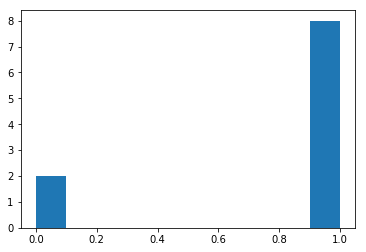

In [2]:
x = np.random.randint(2, size=10)#defines x as an array of 1o random integers between 0 and 1
plt.hist(x)

The above histogram shows the amount of times an array of 10 integers indexed from 0 to 1 (i.e. count of 2) has been generated. As the distribution of these is discrete uniform, each integer has an equal probability of being chosen in the 10 picks. 

I noticed from the [Numpy documentation page on numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) that the next four functions (**random_sample**, **random**, **ranf**, and **sample** functions) all return random floats in the half open interval (again from 0.0 up to but not including 1.0) in the "continuous uniform" distribution.  

![random.jpg](random.jpg)

I found some [sample code](https://www.geeksforgeeks.org/random-walk-implementation-python/) online that uses the **random_sample** function for a 1 dimensional random walk:

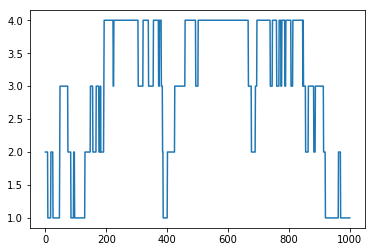

In [3]:
# https://www.geeksforgeeks.org/random-walk-implementation-python/
# Python code for 1-D random walk. 

# Probability to move up or down 
prob = [0.05, 0.95] 

# statically defining the starting position 
start = 2
positions = [start] 

# creating the random points 
rr = np.random.random_sample(1000) 
downp = rr < prob[0] 
upp = rr > prob[1] 


for idownp, iupp in zip(downp, upp): 
	down = idownp and positions[-1] > 1
	up = iupp and positions[-1] < 4
	positions.append(positions[-1] - down + up) 

# plotting down the graph of the random walk in 1D 
plt.plot(positions) 
plt.show() 


This demonstrates the continuous uniform distribution of the 1000 steps in the trajectory of the random walk.  

Following from this is the **randn()** function, that [generates an array filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn), which involved quite a bit of Gooling to try to understand! [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution) confirms that the Gaussian distribution is also know as "normal" distribution and "the bell curve". With this the majority of the data falls in the middle of the distribution, as when the random sample size is large enough, they become normally distributed. I read [a post on stackoverflow.com](https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution) that suggested using [Seaborn](https://seaborn.pydata.org/) for plotting a graph that displays this so I tried it out.

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


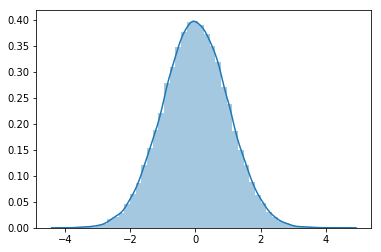

In [4]:
import seaborn as sns #to import Seaborn
value1 = np.random.randn(100000)#defines value1 as an array of 100000 random floats from a normal distribution 
sns.distplot(value1)#plots value1 as a distplot

This graph displays a bell-shaped curve, centered at zero, which is typical of the normal distribution, as [the shape of the normal distribution is completely described by the mean and the standard deviation](https://stattrek.com/online-calculator/normal.aspx). 

## Permutations
The Permutations functions of numpy.random are [shuffle(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.shuffle.html) and [permutation(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation).  

Both of these functions relate to re-arranging provided random data. The shuffle(x) function shuffles data on the first axis of a multi-dimensional array, where the order of sub-arrays is changed but the contents remain the same.  The permutation(x) function however, when given an array, takes a copy and shuffles the elements randomly.

### Multi Dimensional Array

In [5]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.random.shuffle(M)
M

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

As you can see above, the sequence that the sets are displayed in has been shuffled, but the numbers inside the brackets have remained in the same order they were originally written in.

### 1 Dimensional Array
With an array that is 1 Dimensional, the shuffle(x) function 

In [6]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
M = np.array([4,8,15,16,23,42])
np.random.shuffle(M)
M

array([16, 15,  4, 42,  8, 23])

The sequence that the sets are displayed in has been shuffled, but the contents inside the brackets have remained in the same order.

In [7]:
#example using an array from https://www.w3cschool.cn/doc_numpy_1_10/numpy_1_10-generated-numpy-random-permutation.html
array = np.random.permutation([1, 4, 9, 12, 15])
array

array([12,  1,  9, 15,  4])

In the case of an integer, the permutation function randomly permutes it's range:

In [8]:
#example using an integer 
integer = np.random.permutation(8)
integer

array([7, 1, 6, 2, 3, 5, 4, 0])

While researching why these functions would be used I found further material on [Machine Learning Mastery](https://machinelearningmastery.com/introduction-to-random-number-generators-for-machine-learning/) that explains this in terms of algorithms and training data and the need to shuffle data so that better performing mapping of the data is achieved. [This blog post](https://www.linkedin.com/pulse/data-shuffling-why-important-machine-learning-how-do-deepak-n-gowda) offers a concise explanation as to why these functions are necessary - "In machine learning, we are often presented with a dataset that will be further split into training, testing & validation datasets. It is very important that dataset is shuffled well to avoid any element of bias/patterns in the split datasets before training the ML model".

## Distributions
The numpy.random package offers a range of random samples that can be drawn from a number of diverse probability distributions.  

The **binomial** distribution is the [distribution of the possible number of successful outcomes in a given number of trials in each of which there is the same probability of success](https://en.oxforddictionaries.com/definition/binomial_distribution).  A binomial distribution is discrete as only 1 or 0 is a valid outcome, so is best described in terms of success or failure. The Numpy documentation gives a good example of code to demonstrate this and I found some code to plot if effectively [here](http://cmdlinetips.com/2018/03/probability-distributions-in-python/)

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Binomial Distribution')]

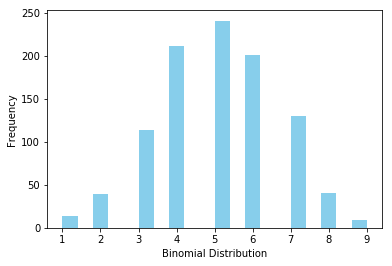

In [9]:
n, p = 10, 0.5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)# result of flipping a coin 10 times, tested 1000 times
ax = sns.distplot(s,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')#http://cmdlinetips.com/2018/03/probability-distributions-in-python/


Samples can also be drawn from a **poisson** distribution, which is [the limit of the binomial distribution for large N](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html#numpy.random.poisson). It expresses the frequency of events during a specific interval of time and can be used to predict further events on that basis.  While it is similar to the binomial distrubution in that it counts discrete occurrences, the series that it counts them in is continuous.

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


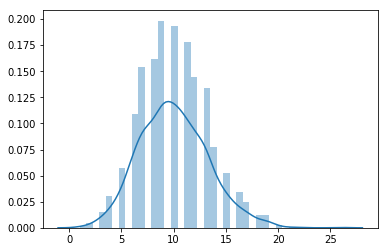

In [10]:
s = np.random.poisson(10, 2000)
sns.distplot(s)

The graph above shows the probability of the occurring events as a histogram and the interval that they occur in is expressed as the curve tracking over it's bins.

The exponential distribution can be used to find the time interval between two such events in a Poisson point process, i.e. [a process in which events occur continuously and independently at a constant average rate](https://en.wikipedia.org/wiki/Exponential_distribution).  Graphing this proved challenging until I found a post on [stackoverflow.com](https://stackoverflow.com/questions/43311127/the-exponential-distribution-didnt-show-up-in-the-shell) that gave me the idea to import the [expon function from scipy.stats](https://stackoverflow.com/questions/43311127/the-exponential-distribution-didnt-show-up-in-the-shell) 

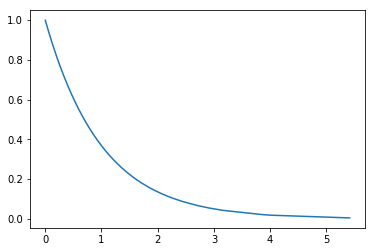

In [11]:
p = np.random.exponential(0.5, 1000)
from scipy.stats import expon #to plot curve typical of exponential distribution, borrowed from https://stackoverflow.com/questions/43311127/the-exponential-distribution-didnt-show-up-in-the-shell
sns.lineplot(p, expon.pdf(p))

The function **numpy.random.uniform** draws samples from a uniform distribution, much like the **randint** function I discussed earlier. However, the randint function generates a selection of values in a given range in a given array size, while numpy.random.uniform picks samples that are uniformly distributed over the half-open interval, so that any value in the range of the parameters has an equal probability of being chosen.

In [12]:
np.random.randint(-1,1,100)

array([ 0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,
        0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0, -1,
        0,  0,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0])

In [13]:
np.random.uniform(-1,1, 100)

array([-0.62296411, -0.46669394, -0.43903393,  0.95697157, -0.01624764,
        0.73530116,  0.75277143, -0.88474531,  0.00619246, -0.6920215 ,
        0.25804603,  0.62008085, -0.02131257, -0.35346296,  0.11348749,
        0.94226121,  0.02345464, -0.9544973 , -0.53580559, -0.92203686,
       -0.02132439,  0.50118943, -0.79673584,  0.98633201, -0.75852334,
        0.54660615,  0.24585689,  0.83751998, -0.79585056,  0.49080821,
       -0.50511746,  0.07070339,  0.51208094, -0.00770574,  0.34869326,
        0.40894009,  0.98882075,  0.94597171, -0.30056476,  0.83560653,
       -0.67030688,  0.85904903,  0.28727464,  0.04675608,  0.92655255,
       -0.16362577, -0.40876982, -0.27955979, -0.01097256,  0.92998373,
        0.59638517,  0.03630828,  0.63300886, -0.55486711,  0.36420976,
        0.54036635, -0.71214095,  0.45418051, -0.78350057, -0.16478292,
       -0.71965761,  0.48311814,  0.80033948,  0.65360059,  0.2888329 ,
        0.09564051,  0.8645618 ,  0.26578923, -0.16236732,  0.37

While researching for this assignment I found a great detailed blog post on the Beta distribution that explains it as [a distribution for probabilities. Beta distribution is a continuous distribution taking values from 0 to 1. It is defined by two parameters alpha and beta, depending on the values of alpha and beta they can assume very different distributions](http://cmdlinetips.com/2018/03/probability-distributions-in-python/) It is basically a probability distribution of probabilities. I decided to try chart 3 different probability curves within one graph using **numpy.random.beta** to demonstrate this:

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


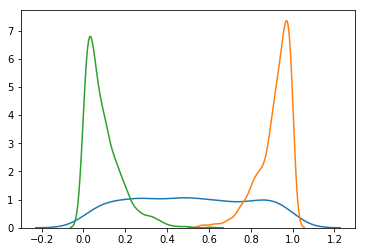

In [14]:
alpha = 1
beta = 1
p = np.random.beta(alpha, beta, 1000)#to create a random array of 1000 samples with uniform distribution
sns.kdeplot (p)

alpha = 10
beta = 1
q = np.random.beta(alpha, beta, 1000)#to create a random array of 1000 samples skewed to the right
sns.kdeplot(q)

alpha = 1
beta = 10
r = np.random.beta(alpha,beta, 1000)#to create a random array of 1000 samples skewed to the left
sns.kdeplot(r)

## Random Seed

As briefly mentioned earlier, the numpy.random module is based on a Pseudo Random Number Generator (PRNG) named the Mersenne Twister, which is initialised from a number called the [random seed](https://en.wikipedia.org/wiki/Random_seed). Examples of seed numbers include those generated by the [/dev/random file](https://en.wikipedia.org/wiki//dev/random) of the computer's operating system or else the system state of the machine at the time of running, for instance, the clock, and these generations are eventually repeated.  This means that the sequence of numbers generated by the seed is actually deterministic and so, is entirely unsuitable for uses such as cryptography, as they can be predicted and are therefore not secure.

The Random Generator package of numpy.random contains 4 functions, RandomState, seed, get_state and set_state.  
RandomState gives the point at which the programme is currently generating numbers from when the function is called:

In [81]:
np.random.RandomState()

In [88]:
x = np.random.seed
print (x)

<built-in method seed of mtrand.RandomState object at 0x000001F45429E1F8>


np.random.seed() resets the state of RandomState and returns a new instance of it. If a piece of code specifies the seed, it will fix the generator at the sequence, and allow for it to be repeated, rather than a new string of values appearing at each run. This is referred to as seeding the generator.  In the below example, I will use random.rand to generate an array of 5 random values, that will change each time the code is run - 

In [74]:
np.random.rand(5)

array([0.62909983, 0.73495258, 0.68834438, 0.03113075, 0.90251384])

However, when I fix the seed at 30 and repeat this function it will repeat the same 5 values each time - 

In [70]:
np.random.seed(30)
np.random.rand(5)

array([0.64414354, 0.38074849, 0.66304791, 0.16365073, 0.96260781])

The repeating array is ([0.64414354, 0.38074849, 0.66304791, 0.16365073, 0.96260781]). 

In programming, randomly generated numbers can be used to test and debug code, but it is important to have consistency in the tests, so for this reason, fixing the seed of the random module can help. (http://hplgit.github.io/scipro-primer/slides/random/html/random-reveal.html) https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array
http://wwwcp.tphys.uni-heidelberg.de/Polymer/day2/random_numbers/p2.htm 
https://www.random.org/randomness/
https://www.ibm.com/developerworks/library/s-playing/ 

## References
1. [NumPy](http://www.numpy.org/)
2. [SciPy](https://scipy.org/)
3. [Random Number Generation](https://en.wikipedia.org/wiki/Random_number_generation)
4. [Probability Sampling Method](https://www.statisticshowto.datasciencecentral.com/probability-sampling/)
5. [How to Generate Random Numbers in Python](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) 
6. [Numpy.random User Documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)
7. [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister)
8. [Python random module](https://docs.python.org/3/library/random.html)
9. [ndarrays](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html)
10.
